# Numerically Solving a PDE using Finite Difference Methods and Deep Learning

I was awarded the P.U.R.E (Program for Undergraduate Research Experience) grant from the University of Calgary when I was an undergrad studying mathematics. This project was completed back then (2021). I have transfered the contents of the report I wrote back then (both the explanations and the code) to this jupyter notebook. This project was my first exposure to deep learning and I had to teach myself the topic in order to complete the project (note that I've updated the deep learning part because I've learnt a lot more about since then). I had to learn finite difference methods from scratch as well. But, I had already studied partial differential equations when I started the project. I completed the project under the supervision of Dr. Wenyuan Liao (the professor who had taught my differential equations class).

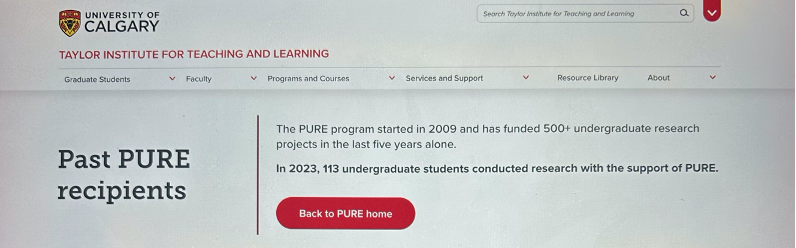

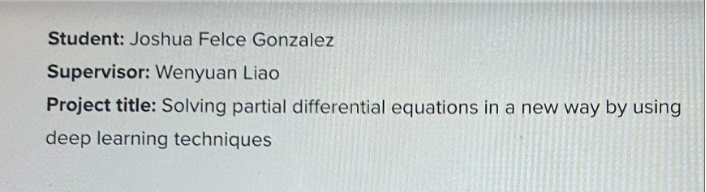

# Introduction

The goal of this project is to solve a partial differential equation through the use of computer programming. PDEs are ubiquitous throughout Math, Science, and Engineering. Thus, solving them accurately and efficiently is of great importance to all of these fields. PDEs can sometimes be solved using pen and paper. However, it is better to solve them numerically through the use of computer programming. This project implements two such ways of doing this. The first of which is the Finite Difference Method (specifically, the Centered Finite Difference Method) and the second of which is Deep Learning (specifically, a Physics Informed Neural Network).

# PDE (Time-Independent Wave Equation)

$U_{xx}$ + $U_{yy}$ + $C^{2}$ U = f(x,y) for (x,y) $\in$ [0,1] x [0,1] and C = 1

This PDE is called the wave equation. We took U(x,y) = sin(x)sin(2y). The function U depends on two spatial coordinates x and y, but it doesn't depend on the time t and is thus the time-independent wave equation.

Then, taking the appropriate partial derivatives we get the following:

$U_{xx}$ = -sin(x)sin(2y)

$U_{yy}$ = -4sin(x)sin(2y)

And thus,

f(x,y) = $U_{xx}$ + $U_{yy}$ + $C^{2}$ U = -sin(x)sin(2y) - 4sin(x)sin(2y) + $1^{2}$ sin(x)sin(2y) = -4sin(x)sin(2y)

Therefore, the PDE we want to solve is given by

$U_{xx}$ + $U_{yy}$ + $C^{2}$ U = -4sin(x)sin(2y)

Of course, we already know that the solution is U(x,y) = sin(x)sin(2y) but the whole point is to recreate this solution using our two numerical methods (more on this in the Final Thoughts section).

# Boundary Conditions

The domain is the unit square with vertices at (0,0), (1,0), (0,1) and (1,1).

At the bottom of the domain the x coordinate varies from zero to one while the y coordinate remains fixed at zero. Thus, the bottom boundary condition is given by U(x,0) = sin(x)sin(2*0) = sin(x)sin(0) = 0.

At the leftmost part of the domain the y coordinate varies from zero to one while the x coordinate remains fixed at zero. Thus, the leftmost boundary condition is given by U(0,y) = sin(0)sin(2y) = 0.

At the rightmost part of the domain the y coordinate varies from zero to one while the x coordinate remains fixed at one. Thus, the rightmost boundary condition is given by U(1,y) = sin(1)sin(2y).

Lastly, at the top of the domain the x coordinate varies from zero to one while the y coordinate remains fixed at one. Thus, the top boundary condition is given by U(x,1) = sin(x)sin(2*1) = sin(x)sin(2).

A picture will make this clear.

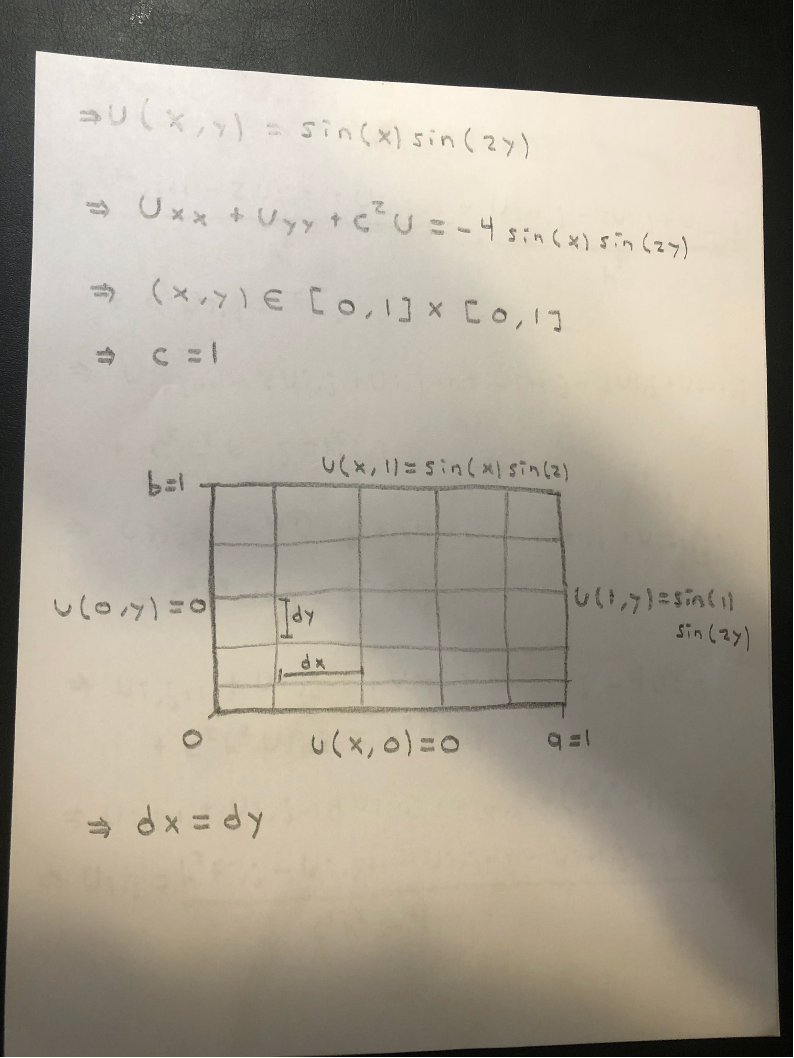

# Centered Finite Difference Method Derivation

The essence of the Centered Finite Difference Method is to replace the partial derivatives in the PDE with finite differences. Namely, suppose j = x-axis and i = y-axis.

Then, we can replace $U_{xx}$ with the following expression:

$\frac{U_{i,j+1} - 2U_{i,j} + U_{i,j-1}}{dx^{2}}$

And, we can replace $U_{yy}$ with the following expression:

$\frac{U_{i+1,j} - 2U_{i,j} + U_{i-1,j}}{dy^{2}}$

The finite difference method clops up the domain into a mesh (pictured below).

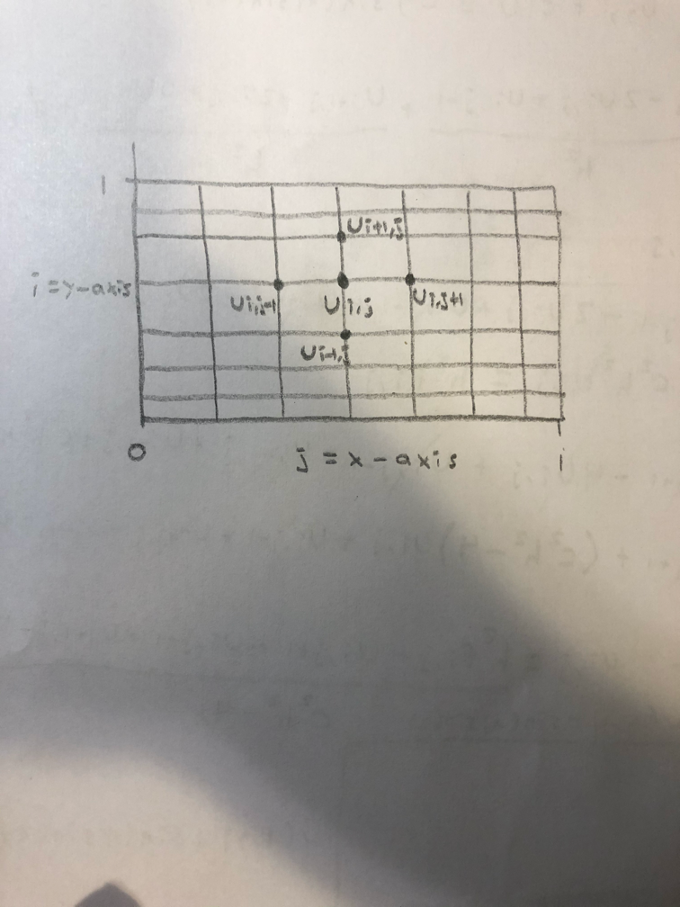

Instead of solving the PDE at any arbitrary point (x,y) in the domain, we solve it at one of the Mesh points $U_{i,j}$. The distance between Mesh points in the x-direction is dx and the distance between Mesh points in the y-direction is dy. For convenience, we can let dx = dy and call this quantity h. Then, we can derive the formula for the solution of the PDE at some Mesh point $U_{i,j}$ like so

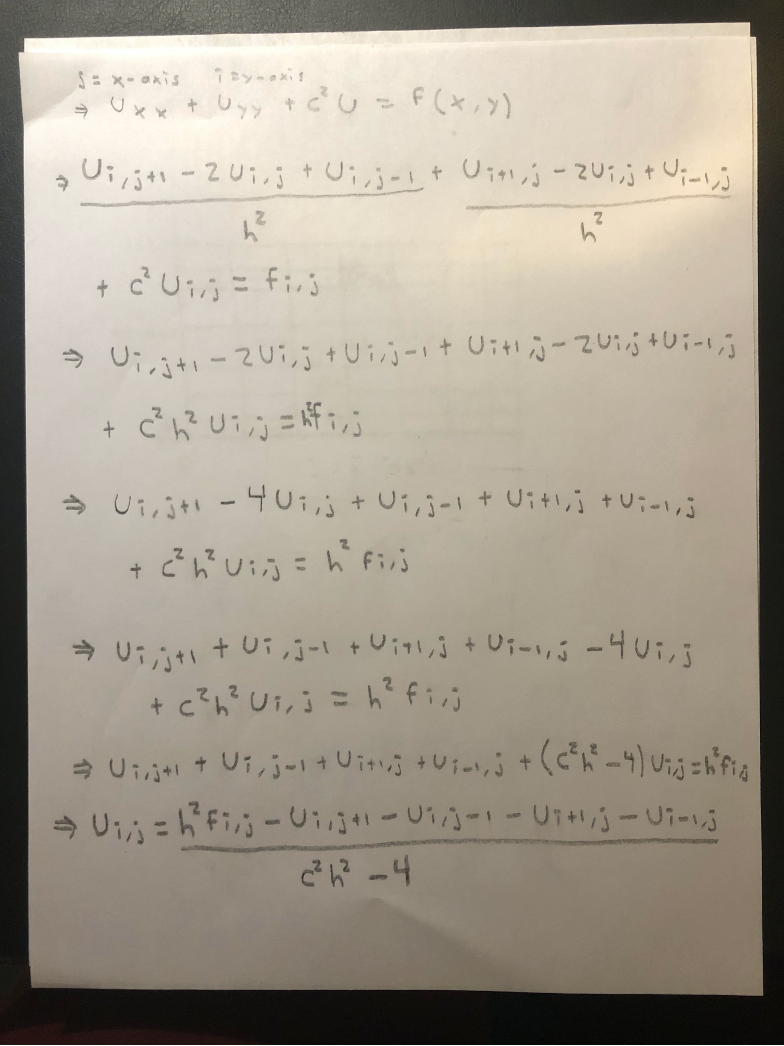

# Coding the Centered Finite Difference Method

Let's walk through what the code is doing.

We start by defining the rightmost boundary of the x-axis. Recall that the domain is the unit square, and thus the rightmost boundary of the x-axis is a = 1. Then, we define the uppermost boundary of the y-axis to be b = 1 and we define the constant C to equal 1. Then, we define the number of Mesh points in the x-direction to be n_x = 100 and we define the number of Mesh points in the y-direction to be n_y = 100. We define the distance between Mesh points in the x-direction to be dx = a/n_x and the distance between Mesh points in the y-direction to be dy = b/n_y. Notice that dx = dy. Let's define the spacing to be h = dx = dy.

Then, we define x to vary from zero to one with a spacing of h = dx. Likewise, we define y to vary from zero to one with a spacing of h = dy. Next, we calculate the exact analytical solution using U(x,y) = sin(x)sin(2y). And we plot the analytical solution using a contour plot.

Next, we move on to the numerical solution using the finite difference method. We start by defining the boundary conditions, then we use the formula for $U_{i,j}$ derived above to solve the PDE at each Mesh point. Then, we plot this numerical solution using a contour plot. Lastly, we calculate the error between the exact solution and the numerical solution and plot this error using a contour plot.

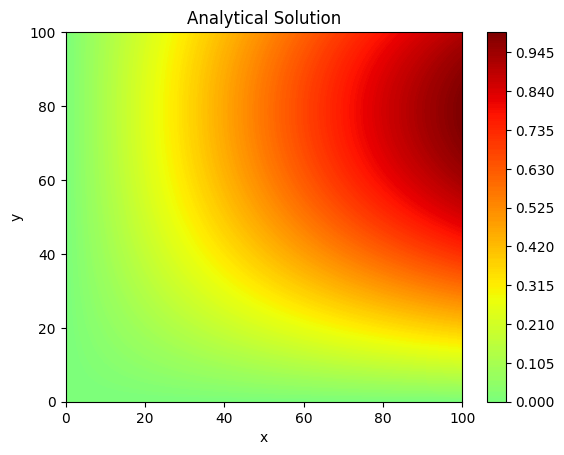

In [7]:
import numpy as np
import matplotlib.pyplot as plt

'''
-U(x,y) = sin(x)sin(2y)
-(x,y) is an element of [0,1] x [0,1]
-Solving U_xx + U_yy + C^2 U = -4sin(x)sin(2y)
'''

#Defining the rightmost boundary of the x-axis/Defining the uppermost boundary of the y-axis/Defining the constant C
a = b = c = 1
#Number of Mesh points in the x-direction/Number of Mesh points in the y-direction
n_x = n_y = 100
#Spacing between points
dx = a/n_x
dy = b/n_y
h = dx
#Defining the Grid
x = np.linspace(0, a, n_x + 1)
y = np.linspace(0, b, n_y + 1)
#Matrix of zeros
u = np.zeros((n_y + 1, n_x + 1))
#Calculating the Analytical solution
for i in range(n_y + 1):
    for j in range(n_x + 1):
        u[i,j] = np.sin(x[j])*np.sin(2*y[i])
#Plotting the analytical solution
maxu = np.max(u)
nu = u/maxu
plt.figure()
contour = plt.contourf(nu, levels=200, cmap='jet')
plt.title('Analytical Solution')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(contour)
plt.clim(-1, 1)
plt.show()

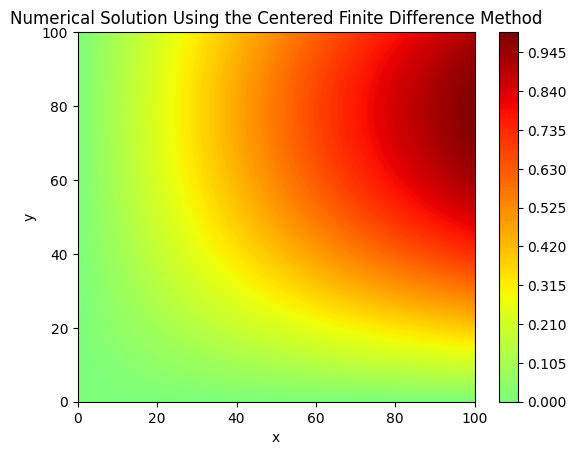

In [8]:
#f_i,j
ucopy = -4.0 * u
#Numerical Solution
coeff = 1.0/(c**2 * h**2 - 4)
#Initial guess
U = np.zeros((n_y + 1,n_x + 1))
#Boundary conditions
U[0,:] = 0
U[:,0] = 0
U[n_y,:] = np.sin(x)*np.sin(2*1)
U[:,n_x] = np.sin(1)*np.sin(2*y)
#iteration number
iter_number = 10000
#Calculating the numerical solution using the central finite difference method
for k in range(iter_number):
    for i in range(1, n_y):
        for j in range(1, n_x):
            U[i,j] = coeff * (
                h**2 * ucopy[i,j]
                - U[i,j+1]
                - U[i,j-1]
                - U[i+1,j]
                - U[i-1,j])
#Plotting the numerical solution
maxU = np.max(U)
nU = U/maxU
plt.figure()
contour = plt.contourf(nU, levels=200, cmap='jet')
plt.title('Numerical Solution Using the Centered Finite Difference Method')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(contour)
plt.clim(-1, 1)
plt.show()

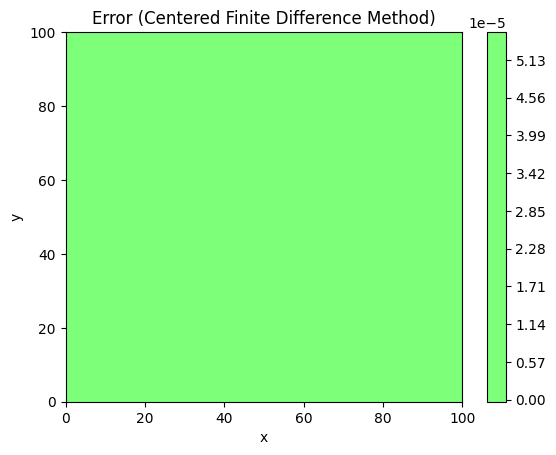

In [17]:
#Calculating the error
E = nu - nU
#Plotting the error
plt.figure()
contour = plt.contourf(E, levels=200, cmap='jet')
plt.title('Error (Centered Finite Difference Method)')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(contour)
plt.clim(-1, 1)
plt.show()

The exact analytical solution and the approximate numerical solution are virtually indistinguishable. The error plot is all green meaning that the difference between the analytical solution and the numerical solution is essentially zero. Note that it's "essentially zero" but not exactly zero. The difference between the analytical solution and the numerical solution is of the order of $10^{-5}$. So, a very small number virtually indistinguishable from zero. Now that we've solved our partial differential equation using the Centered Finite Difference Method, let's solve it using our second method (Deep Learning).

# Deep Learning

In this section, we're going to build a PINN (Physics Informed Neural Network). PINNs are neural networks with a PDE added to the loss function in order to promote solutions that satisfy known physics.  

The loss function needs to have a term that accounts for the PDE, in addition to the usual data-related part.
So, the loss function L equals the following:

L = $L_{data}$ + $L{equation}$

Let's discuss the data loss. We'll be using the usual mean squared error (MSE) for the data loss. To compute the MSE we need predicted values and actual values. So, are there any points (x,y) in our domain where we know the output U(x,y)?

Yes!

Recall our boundary conditions:

U(x,0) = 0

U(0,y) = 0

U(1,y) = sin(1)sin(2y)

U(x,1) = sin(x)sin(2)

So, we'll compute the data loss using boundary points. That is, we'll pass in boundary points into our neural network. The neural network will make predictions for these boundary points and we'll compute the MSE with the actual values from our boundary conditions.

Let's discuss the equation loss. We'll once be using the mean squared error (MSE) for the equation loss. To satisfy our PDE, a point (x,y) in the domain must satisfy the following expression:

$U_{xx}$ + $U_{yy}$ + $C^{2}$ U + 4sin(x)sin(2y) = 0

The equation loss equals the mean squared error of our PDE. If we manage to minimize this (that is, make it as close to zero as possible) then we automatically satisfy the system's governing PDE. Since boundary points are already being used to calculate the data loss, we'll use interior points to calculate the equation loss.



To summarize, we'll use boundary points (i.e., points on the unit square) to calculate the data loss. And, we'll use interior points (i.e., points inside the unit square) to calculate the equation loss.

# Coding the Physics Informed Neural Network

Let's walk through what the code is doing. We start by defining the neural network. We choose the following architecture:

1) Input layer: 2 neurons corresponding to an input point (x,y)
2) First hidden layer: 50 neurons with the hyperbolic tangent as the activation function
3) Second hidden layer: 50 neurons with the hyberbolic tangent as the activation function
4) Output layer: 1 neuron corresponding to the scalar output U(x,y)

Next, we need to calculate the residual of the PDE. In order to do this we need to compute two different 2nd order partial derivatives ($U_{xx}$ and $U_{yy}$). This is accomplished using automatic differentiation using tensorflow's GradientTape functionality. The model is trained to minimize this residual in the interior of the domain as discussed above.

Next, we compute the total loss. We calculate the equation loss (PDE residual squared error) and the data loss. The data loss is calculated using the boundary points as discussed above. The total loss is the sum of the data loss and the equation loss.

Next, we need to generate training data. We generate interior points (i.e., random (x,y) pairs inside the unit square) and boundary points (i.e., (x,y,U) where (x,y) is on the unit square and U is the corresponding output computed from the appropriate boundary condition).  

Next, we train the neural network. This process minimizes the total loss via backpropagation.

Lastly, we once again plot the exact analytical solution. Then, we create a Mesh of (x,y) points in the domain and we use the trained model to predict U(x,y). We plot the prediction as a contour plot and plot the error as a contour plot as well.

To summarize, this PINN solves our PDE by penalizing deviation from the PDE inside the domain and by enforcing boundary conditions at the edges.

In [12]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#Define the constant C
C = 1.0

#Define the neural network
def create_neural_network():
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(shape=(2,)), #Input: (x,y)
        tf.keras.layers.Dense(50, activation='tanh'), #Hidden layer 1
        tf.keras.layers.Dense(50, activation='tanh'), #Hidden layer 2
        tf.keras.layers.Dense(1, activation=None)     #Output: U(x,y)
        ])
    return model

#Residual of the PDE
@tf.function #tensorflow decorator used to improve execution speed
def pde_residual(model, x, y):
    with tf.GradientTape(persistent=True) as tape2:
        tape2.watch([x, y])
        with tf.GradientTape(persistent=True) as tape1:
            tape1.watch([x, y])
            inputs = tf.stack([x, y], axis=1)
            u = model(inputs)
        u_x = tape1.gradient(u, x) #1st partial w.r.t x
        u_y = tape1.gradient(u, y) #1st partial w.r.t y
    u_xx = tape2.gradient(u_x, x)  #2nd partial w.r.t x
    u_yy = tape2.gradient(u_y, y)  #2nd partial w.r.t y
    del tape1, tape2 #partials computed; not needed anymore
    #Compute pde residual
    return u_xx + u_yy + C**2 * u - (-4 * tf.sin(x) * tf.sin(2*y))

#Compute the total loss: data_loss + equation_loss
def compute_total_loss(model, interior_points, boundary_points):
    #equation loss using interior points
    x_interior, y_interior = interior_points[:, 0], interior_points[:, 1]
    residual = pde_residual(model, x_interior, y_interior)
    equation_loss = tf.reduce_mean(tf.square(residual)) #MSE
    
    #data loss using boundary points
    x_boundary, y_boundary, u_boundary = boundary_points[:, 0], boundary_points[:, 1], boundary_points[:, 2]
    u_boundary_pred = model(tf.stack([x_boundary, y_boundary], axis=1))
    data_loss = tf.reduce_mean(tf.square(u_boundary_pred[:, 0] - u_boundary)) #MSE
    
    #return total loss
    return data_loss + equation_loss

#Generate training data (interior and boundary points)
def generate_training_data(num_interior=10000, num_boundary=400):
    #Interior Points: random (x,y) pairs in domain [0,1] x [0,1]
    x_interior = np.random.rand(num_interior, 1).astype(np.float32)
    y_interior = np.random.rand(num_interior, 1).astype(np.float32)
    interior_points = np.hstack([x_interior, y_interior])
    
    #Boundary Points
    x = np.linspace(0, 1, num_boundary//4).astype(np.float32)
    y = np.linspace(0, 1, num_boundary//4).astype(np.float32)
    
    xb0 = np.stack([x, np.zeros_like(x)], axis=1) #bottom of domain: x -> 0-1, y -> 0
    xb1 = np.stack([x, np.ones_like(x)], axis=1)  #top of domain: x -> 0-1, y -> 1
    yb0 = np.stack([np.zeros_like(y), y], axis=1) #left of domain: x -> 0, y -> 0-1
    yb1 = np.stack([np.ones_like(y), y], axis=1) #right of domain: x -> 1, y -> 0-1
    
    #Boundary Conditions
    ub0 = np.zeros_like(x)        #U(x,0) = 0
    ub1 = np.sin(x) * np.sin(2)   #U(x,1) = sin(x)sin(2)
    ub2 = np.zeros_like(y)        #U(0,y) = 0
    ub3 = np.sin(1) * np.sin(2*y) #U(1,y) = sin(1)sin(2y)
    
    #Combine boundary coordinates and values
    boundary_points = np.vstack([xb0, xb1, yb0, yb1])
    u_boundary = np.concatenate([ub0, ub1, ub2, ub3])
    boundary_points = np.hstack([boundary_points, u_boundary.reshape(-1,1)])
    
    return interior_points.astype(np.float32), boundary_points.astype(np.float32)

#Train the neural network
def train(model, interior_points, boundary_points, epochs=1000, lr=0.001):
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    interior_points = tf.convert_to_tensor(interior_points, dtype=tf.float32)
    boundary_points = tf.convert_to_tensor(boundary_points, dtype=tf.float32)
    
    #Training
    for epoch in range(epochs):
        with tf.GradientTape() as tape:
            loss = compute_total_loss(model, interior_points, boundary_points)
        #learning weights and biases
        grads = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
        
        #Print loss every 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Loss = {loss.numpy():.6f}")
            
#Creating the model/generating the training data/training the model
model = create_neural_network()
interior_points, boundary_points = generate_training_data()
train(model, interior_points, boundary_points)

Epoch 0: Loss = 2.936942
Epoch 100: Loss = 0.220374
Epoch 200: Loss = 0.116170
Epoch 300: Loss = 0.093116
Epoch 400: Loss = 0.069486
Epoch 500: Loss = 0.047849
Epoch 600: Loss = 0.039409
Epoch 700: Loss = 0.038389
Epoch 800: Loss = 0.038097
Epoch 900: Loss = 0.037874


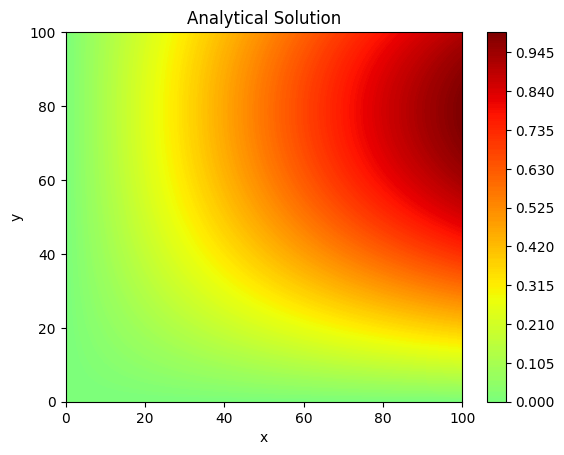

In [13]:
#Analytical Solution
x = np.linspace(0, a, n_x + 1).astype(np.float32)
y = np.linspace(0, b, n_y + 1).astype(np.float32)
u = np.zeros((n_y + 1, n_x + 1))
for i in range(n_y + 1):
    for j in range(n_x + 1):
        u[i,j] = np.sin(x[j])*np.sin(2*y[i])
maxu = np.max(u)
nu = u/maxu
plt.figure()
contour = plt.contourf(nu, levels=200, cmap='jet')
plt.title('Analytical Solution')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(contour)
plt.clim(-1, 1)
plt.show()

319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


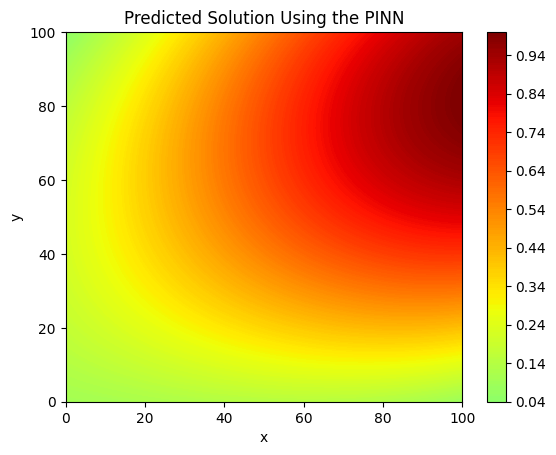

In [14]:
#Predicted solution
x = np.linspace(0, 1, n_x + 1).astype(np.float32)
y = np.linspace(0, 1, n_y + 1).astype(np.float32)
X, Y = np.meshgrid(x, y)
input_grid = np.stack([X.flatten(), Y.flatten()], axis=1)
#Predict U(x,y) using the trained model
u_pred = model.predict(input_grid).reshape(n_x + 1, n_y + 1)
#Contour Plot
maxu_pred = np.max(u_pred)
nu_pred = u_pred/maxu_pred
plt.figure()
contour = plt.contourf(nu_pred, levels=200, cmap='jet')
plt.title('Predicted Solution Using the PINN')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(contour)
plt.clim(-1, 1)
plt.show()

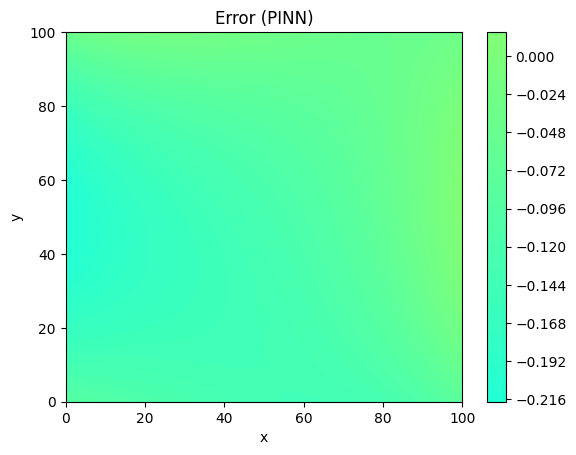

In [16]:
#Calculating the error
E = nu - nu_pred
#Plotting the error
plt.figure()
contour = plt.contourf(E, levels=200, cmap='jet')
plt.title('Error (PINN)')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(contour)
plt.clim(-1, 1)
plt.show()

The exact analytical solution and the predicted solution using the PINN are very close. The error plot is composed of all green meaning that the difference between the analytical solution and the predicted PINN solution is close to zero. Now, we've completed the project. That is, we've solved the PDE given to us by Dr. Liao using the two numerical methods.

# Final Thoughts

In a real world situation, we don't know the analytical solution to a PDE. Therefore, we must resort to numerical methods. This is why learning about numerical techniques like Finite Difference Methods and PINNs is so valuable. Here, we have the analytical solution. But that's because this was a toy problem. Dr. Liao gave us the analytical solution in order to allow us to compare how close our numerical methods got. In the future, we could encounter a PDE in the wild (meaning that, in all likelihood, it would have to be solved numerically) and know how to solve it. Furthermore, this project is a great way to learn about neural networks. And, neural nets are used so widely and have so many applications. This project is a great way to introduce one-self to the topic and introduce one-self to one of the applications of the topic (PINNs).